ASSET PRICING PROJECT

An example of derivative valuation based on simulation. Consider a derivative on an underlying asset such that it is not possible to get the fair price from a closed formula. Estimate the fair price by using simulations.


STEP 1: Calculate the risk free rate. Data are taken from the U.S. Departement of the Treasury.

In [50]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import norm
from sklearn.linear_model import LinearRegression
import seaborn as sns
import math

In [51]:
rates_2018 = pd.read_csv('/Users/ilonaciobanu/Desktop/Asset/Data/rates_2018.csv')
rates_2019 = pd.read_csv('/Users/ilonaciobanu/Desktop/Asset/Data/rates_2019.csv')
rates_2020 = pd.read_csv('/Users/ilonaciobanu/Desktop/Asset/Data/rates_2020.csv')
rates_2021 = pd.read_csv('/Users/ilonaciobanu/Desktop/Asset/Data/rates_2021.csv')
rates_2022 = pd.read_csv('/Users/ilonaciobanu/Desktop/Asset/Data/rates_2022.csv')
rates_2023 = pd.read_csv('/Users/ilonaciobanu/Desktop/Asset/Data/rates_2023.csv')

In [52]:
print("Rates 2018:")
print(rates_2018.head())

print("Rates 2019:")
print(rates_2019.head())

print("Rates 2020:")
print(rates_2020.head())

print("Rates 2021:")
print(rates_2021.head())

print("Rates 2022:")
print(rates_2022.head())

print("Rates 2023:")
print(rates_2023.head())

Rates 2018:
         Date;5 Yr
0  12/31/2018;2.51
1  12/28/2018;2.56
2  12/27/2018;2.60
3  12/26/2018;2.67
4  12/24/2018;2.58
Rates 2019:
         Date;5 Yr
0  12/31/2019;1.69
1  12/30/2019;1.68
2  12/27/2019;1.68
3  12/26/2019;1.72
4  12/24/2019;1.72
Rates 2020:
         Date;5 Yr
0  12/31/2020;0.36
1  12/30/2020;0.37
2  12/29/2020;0.37
3  12/28/2020;0.38
4  12/24/2020;0.37
Rates 2021:
         Date;5 Yr
0  12/31/2021;1.26
1  12/30/2021;1.27
2  12/29/2021;1.29
3  12/28/2021;1.27
4  12/27/2021;1.26
Rates 2022:
         Date;5 Yr
0  12/30/2022;3.99
1  12/29/2022;3.94
2  12/28/2022;3.97
3  12/27/2022;3.94
4  12/23/2022;3.86
Rates 2023:
       Date;5 Yr
0  01/03/23;3.94
1  01/04/23;3.85
2  01/05/23;3.90
3  01/06/23;3.69
4  01/09/23;3.66


In [53]:
# Function to clean and prepare the dataset
def clean_rates(df):
    # Split the 'Date;5 Yr' column into two separate columns
    df[['Date', 'rfr']] = df['Date;5 Yr'].str.split(';', expand=True)
    
    # Drop the original 'Date;5 Yr' column
    df.drop(columns=['Date;5 Yr'], inplace=True)
    
    # Convert the 'rfr' column to numeric, stripping out any percentage signs
    df['rfr'] = pd.to_numeric(df['rfr'].str.replace('%', ''), errors='coerce')
    
    # Return the cleaned DataFrame
    return df

# Clean each year's DataFrame
rates_2018 = clean_rates(rates_2018)
rates_2019 = clean_rates(rates_2019)
rates_2020 = clean_rates(rates_2020)
rates_2021 = clean_rates(rates_2021)
rates_2022 = clean_rates(rates_2022)
rates_2023 = clean_rates(rates_2023)

In [54]:
merged_data = pd.concat([rates_2018, rates_2019, rates_2020, rates_2021, rates_2022, rates_2023])

In [55]:
print(merged_data.head())

         Date   rfr
0  12/31/2018  2.51
1  12/28/2018  2.56
2  12/27/2018  2.60
3  12/26/2018  2.67
4  12/24/2018  2.58


In [86]:
merged_data

,Date,rfr
0,12/31/2018,2.51
1,12/28/2018,2.56
2,12/27/2018,2.60
3,12/26/2018,2.67
4,12/24/2018,2.58
...,...,...
209,11/01/23,4.67
210,11/02/23,4.65
211,11/03/23,4.49
212,11/06/23,4.60


In [57]:
# Rename the '5 Yr' column to 'rfr'
merged_data.rename(columns={'5 Yr': 'rfr'}, inplace=True)

In [58]:
# Convert 'rfr' column to numeric data type
merged_data['rfr'] = pd.to_numeric(merged_data['rfr'], errors='coerce')

In [59]:
average_rfr = merged_data['rfr'].mean()

In [60]:
print("Average rfr:", average_rfr)

Average rfr: 2.042607313195549


In [61]:
#Dataframe DIS
# Define the stock symbol and time range
ticker = "DIS"
start_date = "2018-10-27"
end_date = "2023-11-08"

In [62]:
df_dis = yf.download(ticker, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [87]:
# Print the dataframe
df_dis

,Open,High,Low,Close,Adj Close,Volume,Return
Date,,,,,,,
2018-10-30,113.389999,114.889999,112.410004,114.760002,112.501778,7365400,0.015216
2018-10-31,116.230003,116.519997,114.680000,114.830002,112.570404,9196700,0.000610
2018-11-01,115.199997,116.279999,114.900002,116.099998,113.815414,6779900,0.011060
2018-11-02,116.830002,116.949997,114.370003,115.180000,112.913521,6377900,-0.007924
2018-11-05,115.739998,116.220001,115.120003,115.449997,113.178200,7920800,0.002344
...,...,...,...,...,...,...,...
2023-11-01,81.529999,81.580002,80.180000,81.070000,81.070000,9093000,-0.006373
2023-11-02,81.849998,83.300003,81.820000,83.290001,83.290001,11518500,0.027384
2023-11-03,84.169998,85.930000,84.160004,85.070000,85.070000,11322700,0.021371


In [64]:
df_dis['Return'] = df_dis['Close'].pct_change()

In [65]:
print(df_dis)

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2018-10-29  114.449997  114.940002  111.959999  113.040001  110.815628   
2018-10-30  113.389999  114.889999  112.410004  114.760002  112.501778   
2018-10-31  116.230003  116.519997  114.680000  114.830002  112.570404   
2018-11-01  115.199997  116.279999  114.900002  116.099998  113.815414   
2018-11-02  116.830002  116.949997  114.370003  115.180000  112.913521   
...                ...         ...         ...         ...         ...   
2023-11-01   81.529999   81.580002   80.180000   81.070000   81.070000   
2023-11-02   81.849998   83.300003   81.820000   83.290001   83.290001   
2023-11-03   84.169998   85.930000   84.160004   85.070000   85.070000   
2023-11-06   85.080002   85.800003   83.589996   84.019997   84.019997   
2023-11-07   84.160004   84.680000   83.949997   84.589996   84.589996   

              Volume    Return  
Date

In [66]:

df_dis['Return'] = df_dis['Close'].pct_change()


df_dis.dropna(subset=['Return'], inplace=True)

# Calculate the mean of the daily returns to estimate the drift (μ)
drift = df_dis['Return'].mean()


annual_drift = drift * 252


print("Daily Drift:", drift)
print("Annualized Drift:", annual_drift)


print(df_dis[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Return']])

Daily Drift: -8.357619372545492e-06
Annualized Drift: -0.002106120081881464
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2018-10-30  113.389999  114.889999  112.410004  114.760002  112.501778   
2018-10-31  116.230003  116.519997  114.680000  114.830002  112.570404   
2018-11-01  115.199997  116.279999  114.900002  116.099998  113.815414   
2018-11-02  116.830002  116.949997  114.370003  115.180000  112.913521   
2018-11-05  115.739998  116.220001  115.120003  115.449997  113.178200   
...                ...         ...         ...         ...         ...   
2023-11-01   81.529999   81.580002   80.180000   81.070000   81.070000   
2023-11-02   81.849998   83.300003   81.820000   83.290001   83.290001   
2023-11-03   84.169998   85.930000   84.160004   85.070000   85.070000   
2023-11-06   85.080002   85.800003   83.589996   84.019997   84.019997   
2023-11-07   84.160004   84.680000  

In [67]:
log_returns = np.log(df_dis['Adj Close'] / df_dis['Adj Close'].shift(1))
volatility = log_returns.std() * np.sqrt(252)
print(volatility)

0.3337190753206141


In [68]:
print(df_dis)

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2018-10-30  113.389999  114.889999  112.410004  114.760002  112.501778   
2018-10-31  116.230003  116.519997  114.680000  114.830002  112.570404   
2018-11-01  115.199997  116.279999  114.900002  116.099998  113.815414   
2018-11-02  116.830002  116.949997  114.370003  115.180000  112.913521   
2018-11-05  115.739998  116.220001  115.120003  115.449997  113.178200   
...                ...         ...         ...         ...         ...   
2023-11-01   81.529999   81.580002   80.180000   81.070000   81.070000   
2023-11-02   81.849998   83.300003   81.820000   83.290001   83.290001   
2023-11-03   84.169998   85.930000   84.160004   85.070000   85.070000   
2023-11-06   85.080002   85.800003   83.589996   84.019997   84.019997   
2023-11-07   84.160004   84.680000   83.949997   84.589996   84.589996   

              Volume    Return  
Date

In [69]:
S0 = df_dis['Adj Close'][-1]
print(S0)

84.58999633789062


In [70]:
dividend_string = "1.76 (1.74%)"


dividend_parts = dividend_string.replace('%', '').split()  # ['1.76', '(1.74)']


annual_dividend = float(dividend_parts[0])
dividend_yield_percentage = float(dividend_parts[1].strip('()'))  


dividend_info = (annual_dividend, dividend_yield_percentage)


Model the Underlying Asset: Define the stochastic process for the underlying asset's price movement. For stocks, the Geometric Brownian Motion (GBM) is often used, which requires you to estimate parameters such as drift (mean return), volatility, and the initial price of the asset.

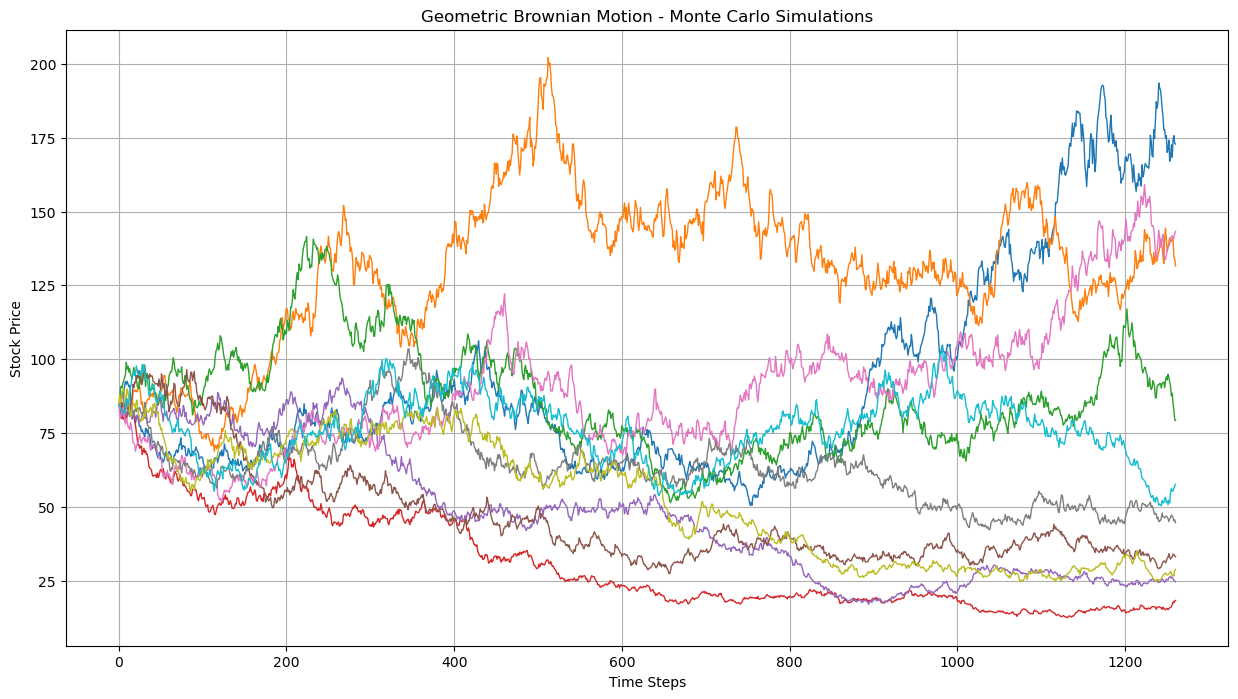

Mean of the final prices: 80.9721319874848
Median of the final prices: 60.835331547248344


In [71]:

def geometric_brownian_motion(T=5, N=252, mu=-0.002106120081881464, sigma=0.33, S0=84.50, num_simulations=1000, seed=None):
    """
    Simulates paths for Geometric Brownian Motion.

    Parameters:
    T : Time horizon in years
    N : Number of time steps (daily steps in a year)
    mu : Drift (mean return of the stock)
    sigma : Volatility (standard deviation of the stock's returns)
    S0 : Initial stock price
    num_simulations : Number of simulation paths
    seed : Random seed for reproducibility

    Returns:
    A numpy ndarray of simulated paths, final prices, mean and median of the final prices.
    """
    if seed is not None:
        np.random.seed(seed)
    
    dt = T / (N * T)  
    dt_sqrt = np.sqrt(dt)
    drift = (mu - 0.5 * sigma**2) * dt
    diffusion = sigma * dt_sqrt
    
    
    prices = np.zeros((num_simulations, N * T + 1))
    prices[:, 0] = S0
    
    
    random_shocks = np.random.standard_normal(size=(num_simulations, N * T))
    prices[:, 1:] = S0 * np.exp(np.cumsum(drift + diffusion * random_shocks, axis=1))
    
    
    final_prices = prices[:, -1]
    mean_final_price = np.mean(final_prices)
    median_final_price = np.median(final_prices)

    return prices, final_prices, mean_final_price, median_final_price

# Run the simulation
simulated_price_paths, final_prices, mean_final_price, median_final_price = geometric_brownian_motion(seed=42)


plt.figure(figsize=(15, 8))
plt.plot(simulated_price_paths[:10].T, lw=1)
plt.title('Geometric Brownian Motion - Monte Carlo Simulations')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.grid(True)
plt.show()


print(f"Mean of the final prices: {mean_final_price}")
print(f"Median of the final prices: {median_final_price}")


Simulate Price Paths: Using the chosen model, simulate a large number of possible future price paths for the underlying asset. The number of simulations should be large enough to ensure the stability of the estimated price of the derivative.

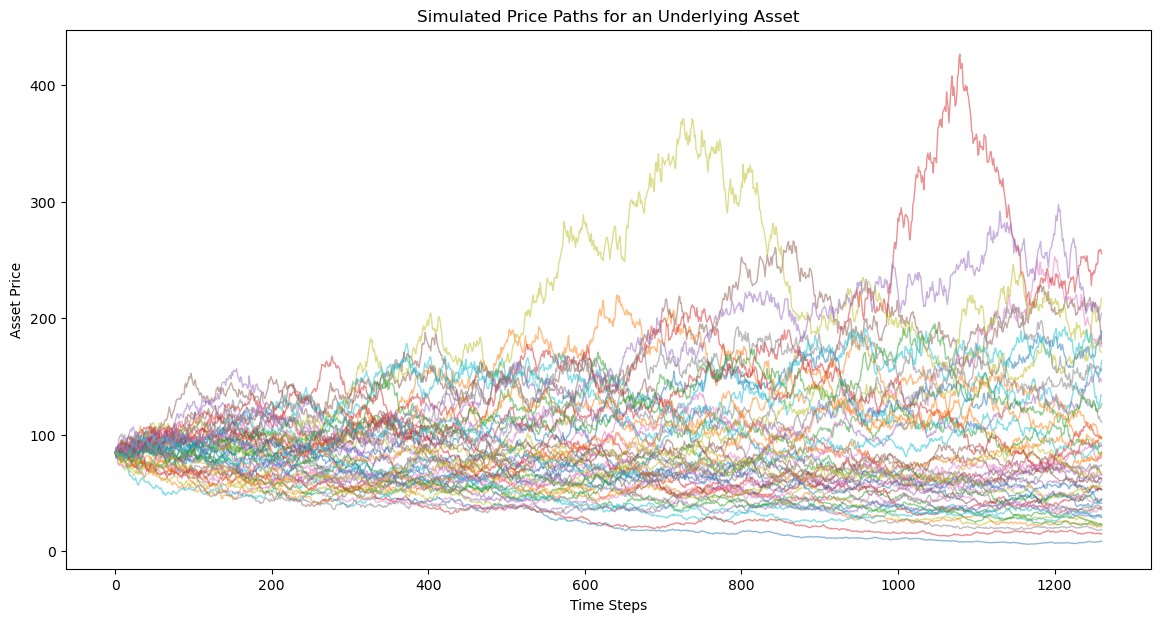

In [72]:
def simulate_price_paths(T, N, mu, sigma, S0, num_simulations):
    """
    Simulate future price paths for an underlying asset using Geometric Brownian Motion.

    Parameters:
    T (float): Total time horizon in years.
    N (int): Number of time steps per year.
    mu (float): Expected return (drift coefficient).
    sigma (float): Volatility (diffusion coefficient).
    S0 (float): Initial asset price.
    num_simulations (int): Number of simulation paths to generate.

    Returns:
    np.ndarray: Simulated price paths.
    """
    
    dt = T / (N * T)
    
    
    drift = (mu - 0.5 * sigma**2) * dt
    diffusion = sigma * np.sqrt(dt)
    
    
    price_paths = np.zeros((num_simulations, N * T + 1))
    price_paths[:, 0] = S0
    
    
    for t in range(1, N * T + 1):
        
        Z = np.random.standard_normal(num_simulations)
        
        price_paths[:, t] = price_paths[:, t - 1] * np.exp(drift + diffusion * Z)
    
    return price_paths


T = 5  # Time horizon in years
N = 252  # Number of time steps (daily steps in a year)
mu = -0.002106120081881464  # Drift (annual return)
sigma = 0.33  # Volatility (standard deviation of returns)
S0 = 84.50  # Initial asset price
num_simulations = 10000  # Number of simulations

# Run the simulation
price_paths = simulate_price_paths(T, N, mu, sigma, S0, num_simulations)


plt.figure(figsize=(14, 7))
for i in range(min(num_simulations, 50)):  # Plot 50 simulations
    plt.plot(price_paths[i], lw=1, alpha=0.5)
plt.title('Simulated Price Paths for an Underlying Asset')
plt.xlabel('Time Steps')
plt.ylabel('Asset Price')
plt.show()


Apply Payoff Function: For each simulated path, calculate the payoff of the exotic derivative at maturity. The payoff function depends on the specific terms and conditions of the derivative.

In [73]:
def derivative_payoff(prices, strike_price, payoff_type='call'):
    """
    Calculate the payoff of the derivative at maturity for each simulated path.

    Parameters:
    prices (np.ndarray): Simulated price paths.
    strike_price (float): The strike price of the derivative.
    payoff_type (str): The type of the derivative ('call' or 'put').

    Returns:
    np.ndarray: Payoff of the derivative for each path.
    """
    
    final_prices = prices[:, -1]
    
    if payoff_type == 'call':
        
        payoffs = np.maximum(final_prices - strike_price, 0)
    elif payoff_type == 'put':
        
        payoffs = np.maximum(strike_price - final_prices, 0)
    else:
        raise ValueError("payoff_type must be 'call' or 'put'")
    
    return payoffs

# Parameters for the simulation
T = 5  # Time horizon in years
N = 252  # Number of time steps per year
mu = -0.002106120081881464  # Drift (annual return)
sigma = 0.33  # Volatility (standard deviation of returns)
S0 = 84.50,  # Initial asset price
num_simulations = 10000  # Number of simulations
strike_price = 70  # Strike price of the derivative
payoff_type = 'call'  # Type of derivative ('call' or 'put')


price_paths = simulate_price_paths(T, N, mu, sigma, S0, num_simulations)


payoffs = derivative_payoff(price_paths, strike_price, payoff_type)


estimated_price = np.mean(payoffs)
print(f"The estimated price of the derivative is: {estimated_price}")


The estimated price of the derivative is: 29.954834454188763


Discount to Present Value: Since you are interested in the price of the derivative today, discount each simulated payoff back to the present using an appropriate risk-free rate.

In [74]:
def discount_payoffs(payoffs, risk_free_rate, T):
    """
    Discount the simulated payoffs back to present value using a risk-free rate.

    Parameters:
    payoffs (np.ndarray): Payoffs of the derivative for each path.
    risk_free_rate (float): The risk-free interest rate.
    T (float): Total time horizon in years.

    Returns:
    np.ndarray: Discounted payoffs to present value.
    """
    
    discount_factor = np.exp(-risk_free_rate * T)
    
    present_values = payoffs * discount_factor
    
    return present_values

# Parameters for the simulation
T = 5  # Time horizon in years
N = 252  # Number of time steps per year
mu = -0.002106120081881464  # Drift (annual return)
sigma = 0.33  # Volatility (standard deviation of returns)
S0 = 84.50  # Initial asset price
num_simulations = 10000  # Number of simulations
strike_price = 70  # Strike price of the derivative
payoff_type = 'call'  # Type of derivative ('call' or 'put')
risk_free_rate = 2.04  # Risk-free interest rate

# Run the simulation
price_paths = simulate_price_paths(T, N, mu, sigma, S0, num_simulations)


payoffs = derivative_payoff(price_paths, strike_price, payoff_type)


discounted_payoffs = discount_payoffs(payoffs, risk_free_rate, T)


estimated_present_value = np.mean(discounted_payoffs)
print(f"The estimated present value of the derivative is: {estimated_present_value}")


The estimated present value of the derivative is: 0.0010943219490004011


Statistical Analysis: Analyze the distribution of the present values obtained from the simulations. The average (mean) of these discounted payoffs can be used as an estimate of the fair price of the derivative.

Mean value: 0.3740917212531994
Median value: 0.08965678352458456
Standard deviation: 0.5813322009730795
Skewness: 2.4534580674465856
Kurtosis: 8.705535862196488


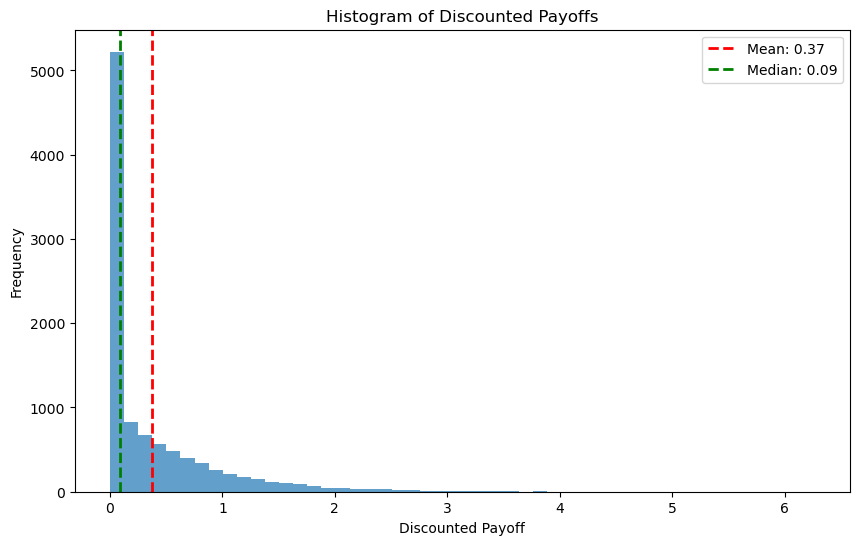

In [75]:
def statistical_analysis(discounted_payoffs):
    mean_value = np.mean(discounted_payoffs)
    median_value = np.median(discounted_payoffs)
    std_dev = np.std(discounted_payoffs)
    skewness = stats.skew(discounted_payoffs)
    kurtosis = stats.kurtosis(discounted_payoffs)
    
    return mean_value, median_value, std_dev, skewness, kurtosis

# Parameters for the simulation
T = 2  # Time horizon in years
N = 252  # Number of time steps per year
mu = -0.002106120081881464  # Drift (annual return)
sigma = 0.33  # Volatility (standard deviation of returns)
S0 = 84.50  # Initial asset price
num_simulations = 10000  # Number of simulations
strike_price = 70  # Strike price of the derivative
payoff_type = 'call'  # Type of derivative ('call' or 'put')
risk_free_rate = 2.04  # Risk-free interest rate

# Run the simulation
price_paths = simulate_price_paths(T, N, mu, sigma, S0, num_simulations)


payoffs = derivative_payoff(price_paths, strike_price, payoff_type)


discounted_payoffs = discount_payoffs(payoffs, risk_free_rate, T)


mean_value, median_value, std_dev, skewness, kurtosis = statistical_analysis(discounted_payoffs)


print(f"Mean value: {mean_value}")
print(f"Median value: {median_value}")
print(f"Standard deviation: {std_dev}")
print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurtosis}")


plt.figure(figsize=(10, 6))
plt.hist(discounted_payoffs, bins=50, alpha=0.7)
plt.title('Histogram of Discounted Payoffs')
plt.axvline(mean_value, color='r', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')
plt.axvline(median_value, color='g', linestyle='dashed', linewidth=2, label=f'Median: {median_value:.2f}')
plt.legend()
plt.xlabel('Discounted Payoff')
plt.ylabel('Frequency')
plt.show()



Confidence Intervals: You may also want to calculate confidence intervals to get a sense of the uncertainty around your price estimate.

In [76]:
def calculate_confidence_intervals(discounted_payoffs, confidence_level=0.95):
    """
    Calculate the confidence intervals for the estimated price of the derivative.

    Parameters:
    discounted_payoffs (np.ndarray): The discounted payoffs from the simulations.
    confidence_level (float): The confidence level for the interval.

    Returns:
    tuple: Lower and upper bounds of the confidence interval.
    """
    mean_value = np.mean(discounted_payoffs)
    std_dev = np.std(discounted_payoffs, ddof=1)  
    n = len(discounted_payoffs)
    
    
    t_critical = stats.t.ppf((1 + confidence_level) / 2, df=n-1)
    margin_of_error = t_critical * (std_dev / np.sqrt(n))
    
    
    lower_bound = mean_value - margin_of_error
    upper_bound = mean_value + margin_of_error
    
    return lower_bound, upper_bound


confidence_level = 0.95
lower_bound, upper_bound = calculate_confidence_intervals(discounted_payoffs, confidence_level)


print(f"The {confidence_level*100}% confidence interval for the price of the derivative is: [{lower_bound}, {upper_bound}]")

The 95.0% confidence interval for the price of the derivative is: [0.36269587029709394, 0.38548757220930485]


Risk Measures: Additionally, you can compute risk measures such as Value at Risk (VaR) or Expected Shortfall (ES) if required.

In [77]:
def calculate_var(discounted_payoffs, confidence_level=0.95):
    """
    Calculate the Value at Risk (VaR) for the derivative's price estimate.

    Parameters:
    discounted_payoffs (np.ndarray): The discounted payoffs from the simulations.
    confidence_level (float): The confidence level for the VaR.

    Returns:
    float: The VaR at the given confidence level.
    """
    sorted_payoffs = np.sort(discounted_payoffs)
    var_index = int((1 - confidence_level) * len(sorted_payoffs))
    var_value = sorted_payoffs[var_index]
    return var_value


def calculate_es(discounted_payoffs, confidence_level=0.95):
    """
    Calculate the Expected Shortfall (ES) for the derivative's price estimate.

    Parameters:
    discounted_payoffs (np.ndarray): The discounted payoffs from the simulations.
    confidence_level (float): The confidence level for the ES.

    Returns:
    float: The ES at the given confidence level.
    """
    sorted_payoffs = np.sort(discounted_payoffs)
    var_index = int((1 - confidence_level) * len(sorted_payoffs))
    es_value = sorted_payoffs[:var_index].mean()
    return es_value


confidence_level = 0.95
var_value = calculate_var(discounted_payoffs, confidence_level)
es_value = calculate_es(discounted_payoffs, confidence_level)


print(f"The {confidence_level*100}% Value at Risk (VaR) is: {var_value}")
print(f"The {confidence_level*100}% Expected Shortfall (ES) is: {es_value}")

The 95.0% Value at Risk (VaR) is: 0.0
The 95.0% Expected Shortfall (ES) is: 0.0


Sensitivity Analysis: Perform sensitivity analyses to understand how changes in model parameters affect the derivative's price.

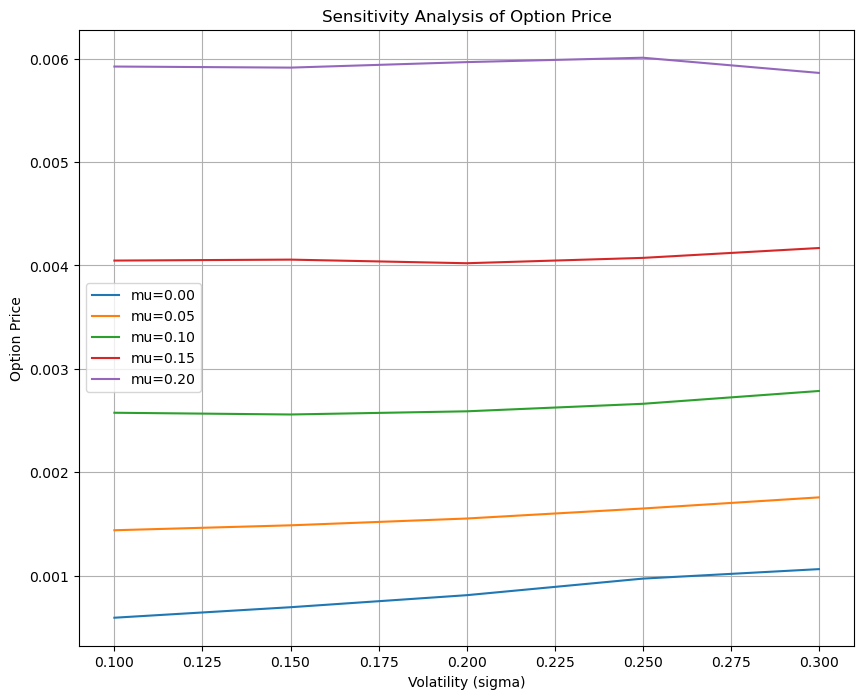

In [78]:
def simulate_gbm(S0, T, mu, sigma, dt=1/252, N=10000):
    """
    Simulate price paths using Geometric Brownian Motion (GBM).

    Parameters:
    S0 (float): Initial stock price.
    T (float): Time to maturity in years.
    mu (float): Annual drift, which is the expected return.
    sigma (float): Annual volatility.
    dt (float): Time step size in years.
    N (int): Number of simulations.

    Returns:
    np.array: Simulated GBM paths.
    """
    n_steps = int(T/dt)
    dt = T/n_steps
    prices = np.zeros((N, n_steps))
    prices[:, 0] = S0
    for t in range(1, n_steps):
        z = np.random.standard_normal(N)
        prices[:, t] = prices[:, t-1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * z)
    return prices


def calculate_payoff(prices, K):
    """
    Calculate the payoff of a European call option.

    Parameters:
    prices (np.array): Simulated GBM paths.
    K (float): Strike price.

    Returns:
    np.array: Payoffs at maturity for each path.
    """
    return np.maximum(prices[:, -1] - K, 0)


def present_value(payoffs, r, T):
    """
    Discount payoffs to present value.

    Parameters:
    payoffs (np.array): Payoffs at maturity for each path.
    r (float): Risk-free rate.
    T (float): Time to maturity in years.

    Returns:
    np.array: Discounted payoffs to present value.
    """
    return payoffs * np.exp(-r * T)

# Define the parameters
S0 = 84.50  # Initial stock price
K = 70  # Strike price
T = 5  # Time to maturity in years
mu = -0.002106120081881464  # Expected return
sigma = 0.33  # Volatility
r = 2.04  # Risk-free rate
N = 10000  # Number of simulations


mu_values = np.linspace(0, 0.2, 5)
sigma_values = np.linspace(0.1, 0.3, 5)


results = np.zeros((len(mu_values), len(sigma_values)))


for i, mu_val in enumerate(mu_values):
    for j, sigma_val in enumerate(sigma_values):
        simulated_prices = simulate_gbm(S0, T, mu_val, sigma_val, N=N)
        payoffs = calculate_payoff(simulated_prices, K)
        discounted_payoffs = present_value(payoffs, r, T)
        option_price = discounted_payoffs.mean()
        results[i, j] = option_price


plt.figure(figsize=(10, 8))
for i, mu_val in enumerate(mu_values):
    plt.plot(sigma_values, results[i, :], label=f'mu={mu_val:.2f}')

plt.title('Sensitivity Analysis of Option Price')
plt.xlabel('Volatility (sigma)')
plt.ylabel('Option Price')
plt.legend()
plt.grid(True)
plt.show()

# European Option Price

In [95]:
class MonteCarloPricing:
    def __init__(self, underlying_spot_price, strike_price, days_to_maturity, risk_free_rate, sigma, number_of_simulations):
        self.S_0 = underlying_spot_price
        self.K = strike_price
        self.T = days_to_maturity / 252  # converting days to years assuming 252 trading days in a year
        self.r = risk_free_rate   
        self.sigma = sigma
        self.N = number_of_simulations
        self.num_of_steps = days_to_maturity
        self.dt = self.T / self.num_of_steps

    def simulate_prices(self):
        np.random.seed(20)  # For reproducibility
        S = np.zeros((self.num_of_steps, self.N))
        S[0] = self.S_0

        for t in range(1, self.num_of_steps):
            Z = np.random.standard_normal(self.N)
            S[t] = S[t - 1] * np.exp((self.r - 0.5 * self.sigma ** 2) * self.dt + (self.sigma * np.sqrt(self.dt) * Z))

        self.simulation_results_S = S

    def _calculate_call_option_price(self):
        if self.simulation_results_S is None:
            return -1
        return np.exp(-self.r * self.T) * np.mean(np.maximum(self.simulation_results_S[-1] - self.K, 0))

    def plot_simulation_results(self, num_of_movements):
        plt.figure(figsize=(12, 8))
        plt.plot(self.simulation_results_S[:, 0:num_of_movements])
        plt.axhline(self.K, c='k', xmin=0, xmax=self.num_of_steps, label='Strike Price')
        plt.xlim([0, self.num_of_steps])
        plt.ylabel('Simulated price movements')
        plt.xlabel('Days in future')
        plt.title(f'First {num_of_movements}/{self.N} Random Price Movements')
        plt.legend(loc='best')
        plt.show()

    def plot_price_distribution_at_expiry(self):
        plt.figure(figsize=(12, 8))
        plt.hist(self.simulation_results_S[-1], bins=50, alpha=0.7, label='Simulated Price Distribution at Expiry')
        plt.axvline(self.K, color='r', linestyle='dashed', linewidth=2, label='Strike Price')
        plt.title('Distribution of Simulated Stock Prices at Expiry')
        plt.xlabel('Stock Price')
        plt.ylabel('Frequency')
        plt.legend()
        plt.show()

    def plot_convergence(self):
        estimated_prices = []
        for i in range(100, self.N, 100):
            estimated_price = np.exp(-self.r * self.T) * np.mean(np.maximum(self.simulation_results_S[-1, :i] - self.K, 0))
            estimated_prices.append(estimated_price)

        plt.figure(figsize=(12, 8))
        plt.plot(range(100, self.N, 100), estimated_prices, marker='o')
        plt.title('Convergence of Option Price Estimate')
        plt.xlabel('Number of Simulations')
        plt.ylabel('Estimated Call Option Price')
        plt.grid(True)
        plt.show()

    def black_scholes_price(self):
        d1 = (np.log(self.S_0 / self.K) + (self.r + 0.5 * self.sigma ** 2) * self.T) / (self.sigma * np.sqrt(self.T))
        d2 = d1 - self.sigma * np.sqrt(self.T)
        call_price = self.S_0 * norm.cdf(d1) - self.K * np.exp(-self.r * self.T) * norm.cdf(d2)
        return call_price

# Example initial values
S0 = 84.59 # Underlying spot price
K = 70   # Strike price
T = 1000  # Time to maturity 
r = 2.04   # Risk-free rate
sigma = 0.33 # Volatility
number_of_simulations = 10000

# Create an instance of MonteCarloPricing, simulate prices, calculate call option price, and plot the results
monte_carlo_model = MonteCarloPricing(S0, K, T, r, sigma, number_of_simulations)
monte_carlo_model.simulate_prices()
call_option_price = monte_carlo_model._calculate_call_option_price()
print("Calculated European Call Option Price:", call_option_price)

# Additional plots
#monte_carlo_model.plot_simulation_results(20)
#monte_carlo_model.plot_price_distribution_at_expiry()
#monte_carlo_model.plot_convergence()

# Comparison with Black-Scholes price
bs_price = monte_carlo_model.black_scholes_price()
print("Black-Scholes European Call Option Price:", bs_price)


Calculated European Call Option Price: 83.62870025462362
Black-Scholes European Call Option Price: 84.56865083933486


# American Option Price

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [17.00717337 16.14861202 16.87550716 ... 13.11159477 15.20832268
  14.16738519]]
Calculated American Call Option Price: 15.714759177424595


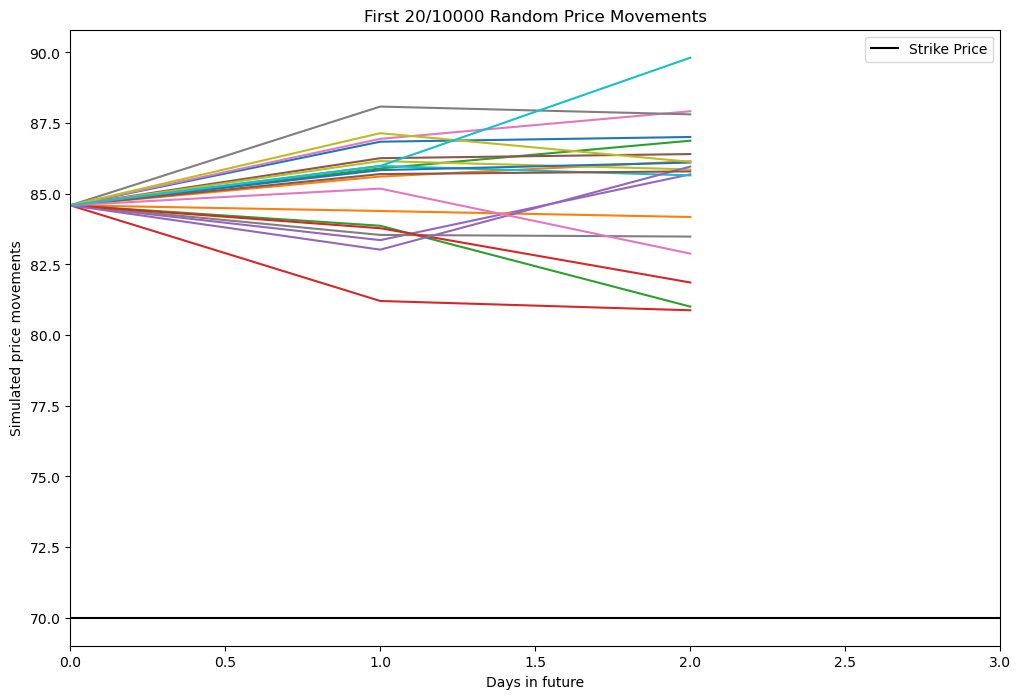

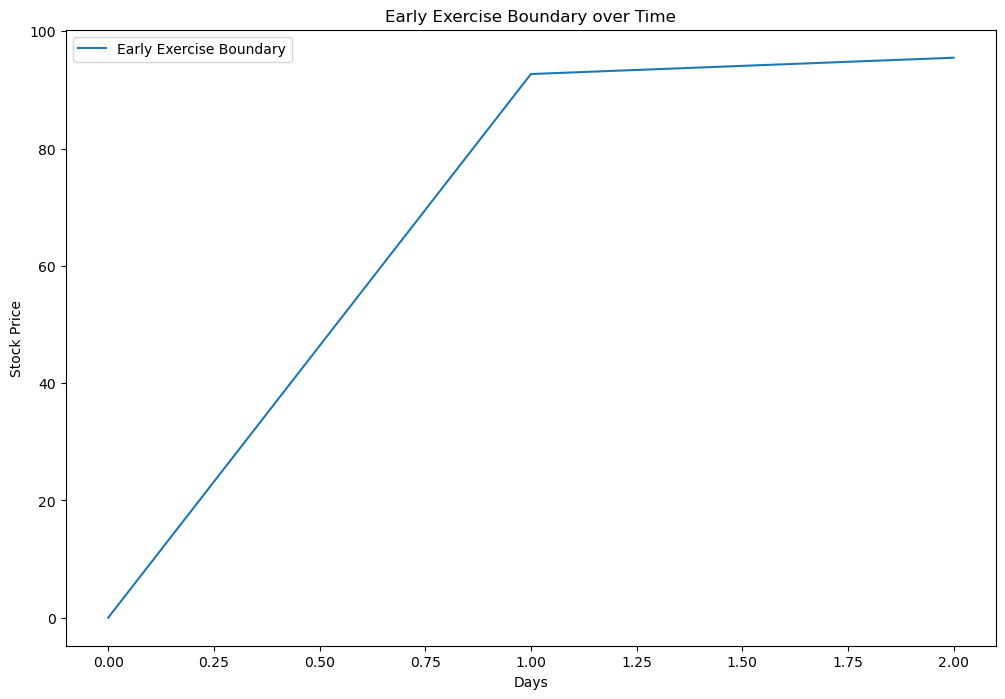

In [98]:
class MonteCarloPricing:
    def __init__(self, underlying_spot_price, strike_price, days_to_maturity, risk_free_rate, sigma, number_of_simulations):
        self.S_0 = underlying_spot_price
        self.K = strike_price
        self.T = days_to_maturity / 252  # converting days to years assuming 252 trading days in a year
        self.r = risk_free_rate  
        self.sigma = sigma
        self.N = number_of_simulations
        self.num_of_steps = days_to_maturity
        self.dt = self.T / self.num_of_steps

    def simulate_prices(self):
        np.random.seed(20)  # For reproducibility
        S = np.zeros((self.num_of_steps, self.N))
        S[0] = self.S_0

        for t in range(1, self.num_of_steps):
            Z = np.random.standard_normal(self.N)
            S[t] = S[t - 1] * np.exp((self.r - 0.5 * self.sigma ** 2) * self.dt + (self.sigma * np.sqrt(self.dt) * Z))

        self.simulation_results_S = S

    def longstaff_schwartz(self):
        payoffs = np.maximum(self.simulation_results_S - self.K, 0)
        values = np.zeros_like(payoffs)
        values[-1] = payoffs[-1]
        print (values)

        for t in reversed(range(1, self.num_of_steps - 1)):
            valid_indices = self.simulation_results_S[t] > self.K
            if np.sum(valid_indices) > 0:
                regression_model = LinearRegression().fit(self.simulation_results_S[t][valid_indices].reshape(-1, 1), values[t + 1][valid_indices] * np.exp(-self.r * self.dt))
                continuation_values = regression_model.predict(self.simulation_results_S[t].reshape(-1, 1))
                exercise = payoffs[t] > continuation_values
                values[t] = np.where(exercise & valid_indices, payoffs[t], values[t + 1] * np.exp(-self.r * self.dt))

        return np.mean(values[1] * np.exp(-self.r * self.dt))

    def plot_simulation_results(self, num_of_movements):
        plt.figure(figsize=(12, 8))
        plt.plot(self.simulation_results_S[:, :num_of_movements])
        plt.axhline(self.K, c='k', xmin=0, xmax=self.num_of_steps, label='Strike Price')
        plt.xlim([0, self.num_of_steps])
        plt.ylabel('Simulated price movements')
        plt.xlabel('Days in future')
        plt.title(f'First {num_of_movements}/{self.N} Random Price Movements')
        plt.legend(loc='best')
        plt.show()

    def plot_early_exercise_boundary(self):
        exercise_boundary = np.zeros(self.num_of_steps)
        for t in range(1, self.num_of_steps):
            exercise_boundary[t] = np.max(self.simulation_results_S[t, np.maximum(self.simulation_results_S[t] - self.K, 0) > 0])

        plt.figure(figsize=(12, 8))
        plt.plot(exercise_boundary, label='Early Exercise Boundary')
        plt.xlabel('Days')
        plt.ylabel('Stock Price')
        plt.title('Early Exercise Boundary over Time')
        plt.legend()
        plt.show()

# Example initial values
S0 = 84.59  # Underlying spot price
K = 70   # Strike price
T = 3  # Time to maturity in trading days (5 years)
r = 2.04   # Risk-free rate
sigma = 0.33 # Volatility
number_of_simulations = 10000

# Create an instance, simulate prices, and calculate the American call option price
monte_carlo_model = MonteCarloPricing(S0, K, T, r, sigma, number_of_simulations)
monte_carlo_model.simulate_prices()
american_call_price = monte_carlo_model.longstaff_schwartz()
print("Calculated American Call Option Price:", american_call_price)

# Plotting the first 20 simulated price movements
monte_carlo_model.plot_simulation_results(20)

# Plotting the early exercise boundary
monte_carlo_model.plot_early_exercise_boundary()

# Lookback Option Price

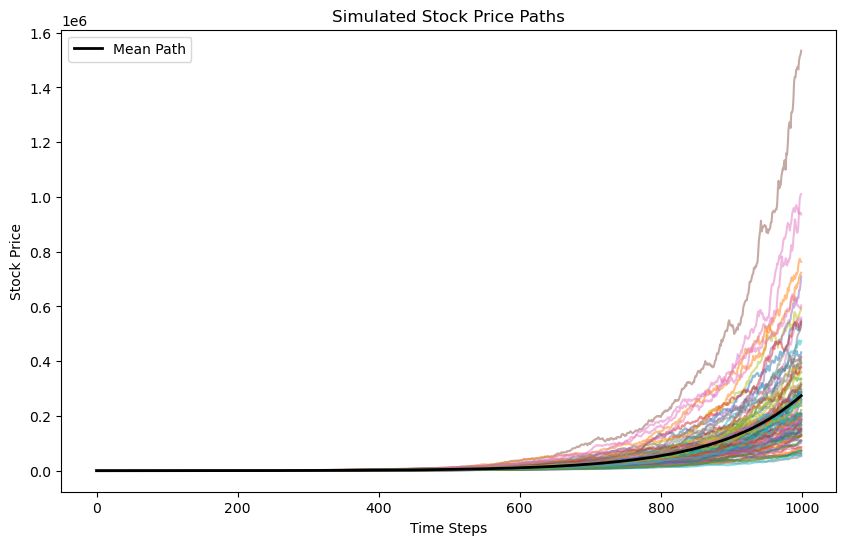

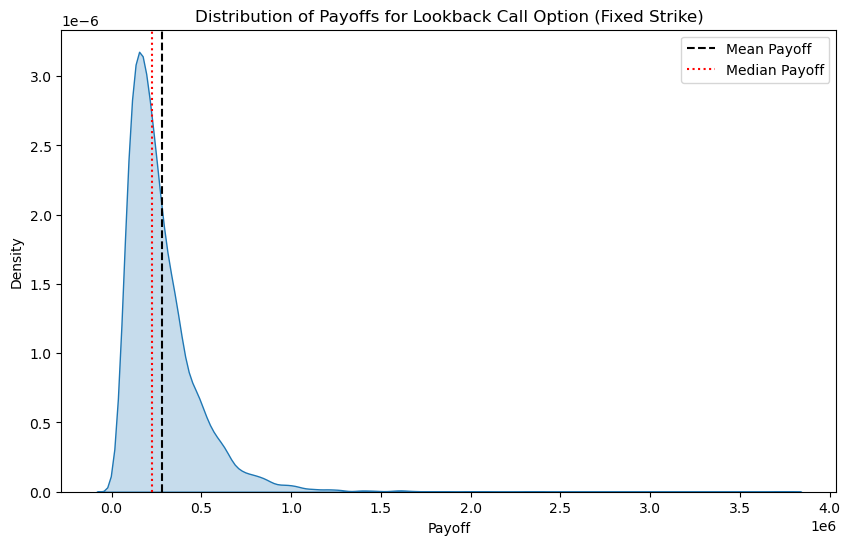

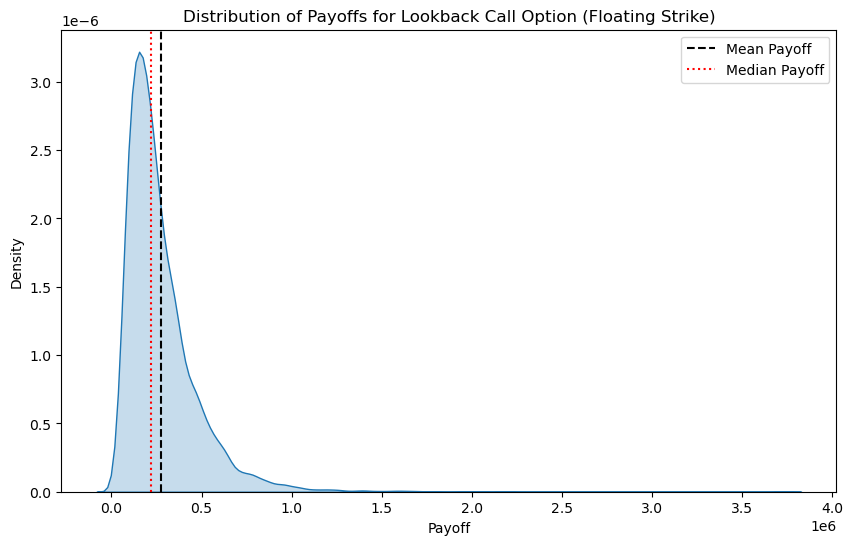

Lookback Call Option (Fixed Strike) Value: 84.9186
Lookback Call Option (Floating Strike) Value: 83.5971


In [120]:

# Initialize parameters
S0 = 84.59
K = 100
T = 1000  # Convert to trading days
r = 2.04  # Adjusted to a decimal
sigma = 0.33
N = 10000  # Number of simulations
num_of_steps = 1000

# Function for simulating price paths
def simulate_price_paths(S0, T, r, sigma, N, num_of_steps):
    dt = T / 252.0 / num_of_steps  
    price_paths = np.zeros((num_of_steps, N))
    price_paths[0] = S0

    for t in range(1, num_of_steps):
        Z = np.random.standard_normal(N)
        price_paths[t] = price_paths[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * Z)
    
    return price_paths

# Enhanced Lookback option pricing functions
def lookback_fixed_strike_call(K, r, T, price_paths):
    max_price = np.max(price_paths, axis=0)
    payoff_call = np.maximum(max_price - K, 0)
    call_price = np.exp(-r * T / 252.0) * np.mean(payoff_call)
    return call_price

def lookback_floating_strike_call(r, T, price_paths):
    min_price = np.min(price_paths, axis=0)
    S_T = price_paths[-1]
    payoff_call = np.maximum(S_T - min_price, 0)
    call_price = np.exp(-r * T / 252.0) * np.mean(payoff_call)
    return call_price

# Generate price paths
price_paths = simulate_price_paths(S0, T, r, sigma, N, num_of_steps)

# Calculate call option prices
C_fix = lookback_fixed_strike_call(K, r, T, price_paths)
C_flt = lookback_floating_strike_call(r, T, price_paths)

# Enhanced plotting functions
def plot_price_paths(price_paths, title, subset=100):
    plt.figure(figsize=(10, 6))
    plt.plot(price_paths[:, :subset], alpha=0.5)  # Plot a subset for clarity
    plt.plot(price_paths.mean(axis=1), color='black', linewidth=2, label='Mean Path')  # Mean path
    plt.title(title)
    plt.xlabel('Time Steps')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

def plot_payoff_distribution(payoffs, title):
    plt.figure(figsize=(10, 6))
    sns.kdeplot(payoffs, fill=True)
    plt.axvline(payoffs.mean(), color='k', linestyle='--', label='Mean Payoff')
    plt.axvline(np.median(payoffs), color='red', linestyle=':', label='Median Payoff')
    plt.title(title)
    plt.xlabel('Payoff')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

# Call the plotting functions
plot_price_paths(price_paths, "Simulated Stock Price Paths")
plot_payoff_distribution(np.maximum(np.max(price_paths, axis=0) - K, 0), "Distribution of Payoffs for Lookback Call Option (Fixed Strike)")
plot_payoff_distribution(np.maximum(price_paths[-1] - np.min(price_paths, axis=0), 0), "Distribution of Payoffs for Lookback Call Option (Floating Strike)")

# Print call option values
print(f'Lookback Call Option (Fixed Strike) Value: {C_fix:.4f}')
print(f'Lookback Call Option (Floating Strike) Value: {C_flt:.4f}')


# RUN CODE 

The premium for the lookback call option is: 56.92933446577106


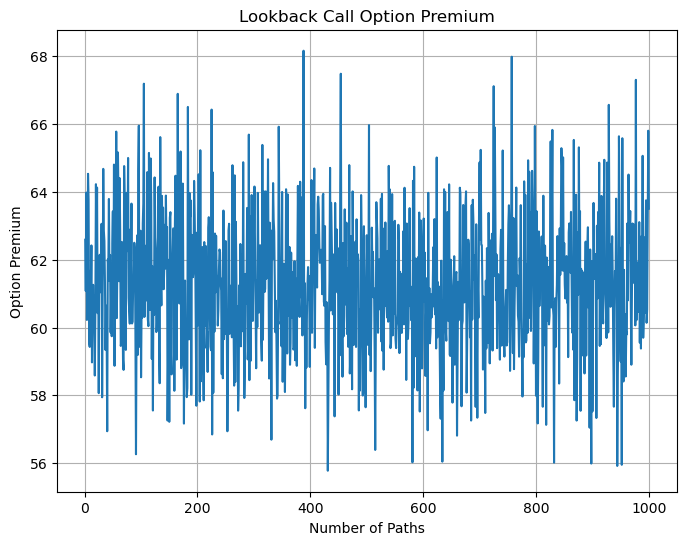

In [82]:
# Initial values

So = 84.59
K = 70
T = 5   # Convert to trading days
r = 0.0204  # Adjusted to a decimal
sigma = 0.33
N = 10  # Number of simulations
M = 1000  # Number of paths



# Function definition
def lookbackcall_fixed(So, K, T, r, sigma, M, N):
    dt = T / N
    sumpayoff = 0.0

    # Main simulation loop
    for j in range(M):
        S = np.zeros(N+1)
        S[0] = So

        # Time integration loop
        for i in range(1, N+1):
            epsilon = np.random.randn()
            S[i] = S[i-1] * (1 + r * dt + sigma * math.sqrt(dt) * epsilon)

        # Compute payoff
        Smax = np.max(S)
        sumpayoff += max(0, Smax - K)

    # Compute discounted expected payoff
    premium = np.exp(-r * T) * (sumpayoff / M)

    return premium

# Run simulation
premium = lookbackcall_fixed(So, K, T, r, sigma, M, N)
print(f"The premium for the lookback call option is: {premium}")

# Example Plot (more sophisticated plots can be created based on needs)
plt.figure(figsize=(8, 6))
plt.title("Lookback Call Option Premium")
plt.xlabel("Number of Paths")
plt.ylabel("Option Premium")
plt.plot(np.arange(1, M+1), [lookbackcall_fixed(So, K, T, r, sigma, M, N) for m in range(1, M+1)])
plt.grid(True)
plt.show()


The premium for the lookback put option is: 14.185017320340062


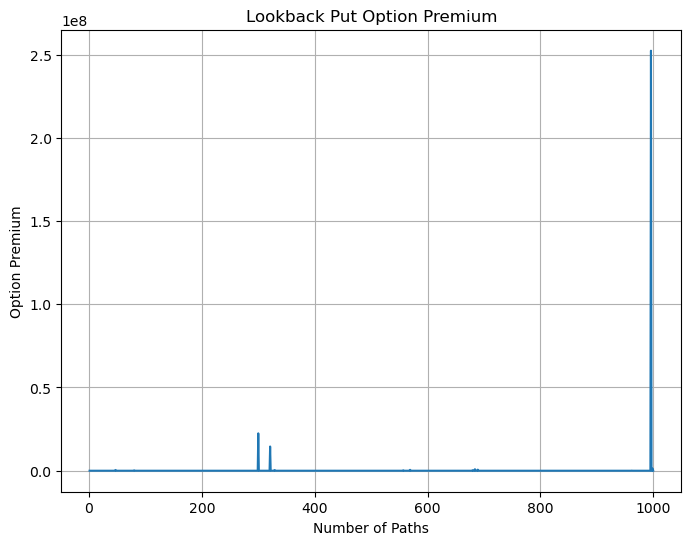

In [104]:
# Initial values
So = 84.59
K = 70
T = 1000  # Convert to trading days
r = 0.0204 # Adjusted to a decimal
sigma = 0.33
N = 100  # Number of simulations
M = 1000  # Number of paths

# Function definition
def lookbackput_fixed(So, K, T, r, sigma, M, N):
    dt = T / N
    sumpayoff = 0.0

    # Main simulation loop
    for j in range(M):
        S = np.zeros(N+1)
        S[0] = So

        # Time integration loop
        for i in range(1, N+1):
            epsilon = np.random.randn()
            S[i] = S[i-1] * (1 + r * dt + sigma * math.sqrt(dt) * epsilon)

        # Compute payoff
        Smin = np.min(S)
        sumpayoff += max(0, K - Smin)

    # Compute discounted expected payoff
    premium = np.exp(-r * T) * (sumpayoff / M)

    return premium

# Run simulation
premium = lookbackput_fixed(S0, K, T, r, sigma, M, N)
print(f"The premium for the lookback put option is: {premium}")

# Example Plot
plt.figure(figsize=(8, 6))
plt.title("Lookback Put Option Premium")
plt.xlabel("Number of Paths")
plt.ylabel("Option Premium")
plt.plot(np.arange(1, M+1), [lookbackput_fixed(So, K, T, r, sigma, M, N) for m in range(1, M+1)])
plt.grid(True)
plt.show()


The premium for the floating strike lookback call option is: 70.34304991770986


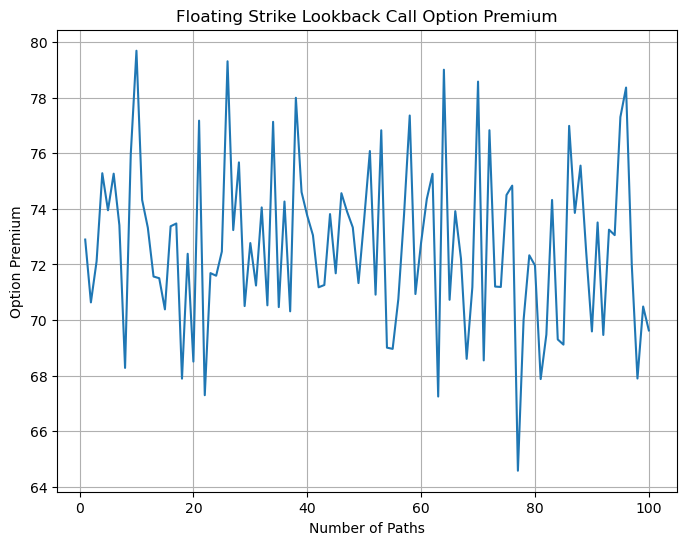

In [84]:
#Floating
#Call

So = 84.59
K = 70
T = 1  #Maturity time
r = 2.04   # Adjusted to a decimal
sigma = 0.33
N = 1000  # Number of simulations
M = 100  # Number of paths

# Function definition
def lookbackcall_floating(So, T, r, sigma, M, N):
    dt = T / N
    sumpayoff = 0.0

    # Main simulation loop
    for j in range(M):
        S = np.zeros(N+1)
        S[0] = So

        # Time integration loop
        for i in range(1, N+1):
            epsilon = np.random.randn()
            S[i] = S[i-1] * (1 + r * dt + sigma * math.sqrt(dt) * epsilon)

        # Compute payoff
        Smin = np.min(S)
        sumpayoff += max(0, S[-1] - Smin)

    # Compute discounted expected payoff
    premium = np.exp(-r * T) * (sumpayoff / M)

    return premium

# Run simulation
premium = lookbackcall_floating(So, T, r, sigma, M, N)
print(f"The premium for the floating strike lookback call option is: {premium}")

# Example Plot
plt.figure(figsize=(8, 6))
plt.title("Floating Strike Lookback Call Option Premium")
plt.xlabel("Number of Paths")
plt.ylabel("Option Premium")
plt.plot(np.arange(1, M+1), [lookbackcall_floating(So, T, r, sigma, M, N) for m in range(1, M+1)])
plt.grid(True)
plt.show()


The premium for the floating strike lookback put option is: 0.023044151498459904


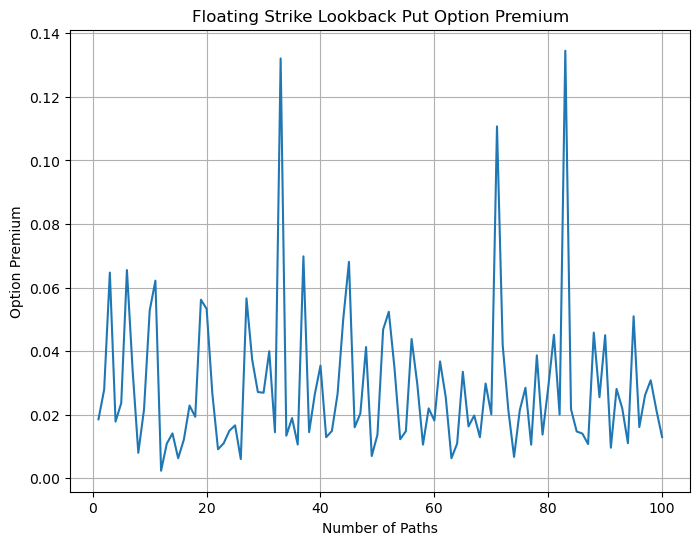

In [107]:
#Put

# Initial values
So = 84.59
K = 70
T = 1000   # Maturity time
r = 0.0204   # Adjusted to a decimal
sigma = 0.33
N = 10  # Number of simulations
M = 100  # Number of paths

# Function definition
def lookbackput_floating(So, T, r, sigma, M, N):
    dt = T / N
    sumpayoff = 0.0

    # Main simulation loop
    for j in range(M):
        S = np.zeros(N+1)
        S[0] = So

        # Time integration loop
        for i in range(1, N+1):
            epsilon = np.random.randn()
            S[i] = S[i-1] * (1 + r * dt + sigma * math.sqrt(dt) * epsilon)

        # Compute payoff
        Smax = np.max(S)
        sumpayoff += max(0, Smax - S[-1])

    # Compute discounted expected payoff
    premium = np.exp(-r * T) * (sumpayoff / M)

    return premium

# Run simulation
premium = lookbackput_floating(So, T, r, sigma, M, N)
print(f"The premium for the floating strike lookback put option is: {premium}")

# Example Plot
plt.figure(figsize=(8, 6))
plt.title("Floating Strike Lookback Put Option Premium")
plt.xlabel("Number of Paths")
plt.ylabel("Option Premium")
plt.plot(np.arange(1, M+1), [lookbackput_floating(So, T, r, sigma, M, N) for m in range(1, M+1)])
plt.grid(True)
plt.show()
